<a href="https://colab.research.google.com/github/tazeezx/COB-Data-Science/blob/main/Phase1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [74]:
import pandas as pd
import numpy as np

Import the dataset using pandas

In [75]:
data = pd.read_csv("/content/dataset - netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Get information about the data

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Start replacing 'Not Given' values to NaN for easy cleaning

In [77]:
data['director'] = data['director'].replace('Not Given', np.NaN)
data['country'] = data['country'].replace('Not Given', np.NaN)
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Find the number of rows which have a null value

In [78]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

Fill those null values with whitespace

In [79]:
new = data.fillna(" ")
new.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Change the datatype to pandas datetime object in the column of 'date_added'

In [80]:
new['date_added'] = pd.to_datetime(new['date_added'], errors = 'coerce')
new['date_added'] = new['date_added'].dt.strftime('%d/%m/%y')

In [81]:
missed_dates = new['date_added'].isnull().sum()

In [82]:
duration = lambda duration: int(duration) if isinstance(duration, int) else int(''.join(filter(str.isdigit, duration)))
new['duration'] = new['duration'].apply(duration)
new

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25/09/21,2020,PG-13,90,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,24/09/21,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,24/09/21,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,22/09/21,2021,TV-PG,91,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,24/09/21,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,,Turkey,17/01/17,2016,TV-PG,2,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,,United States,13/09/18,2016,TV-Y7,3,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,,Pakistan,15/12/16,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,,Pakistan,23/06/18,2016,TV-Y,1,Kids' TV


<Axes: xlabel='release_year'>

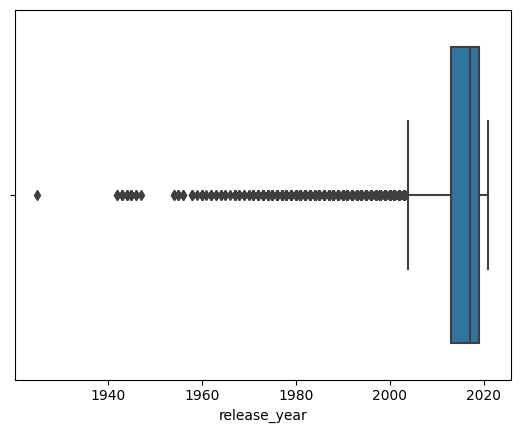

In [83]:
import seaborn as sns
sns.boxplot(x=new['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

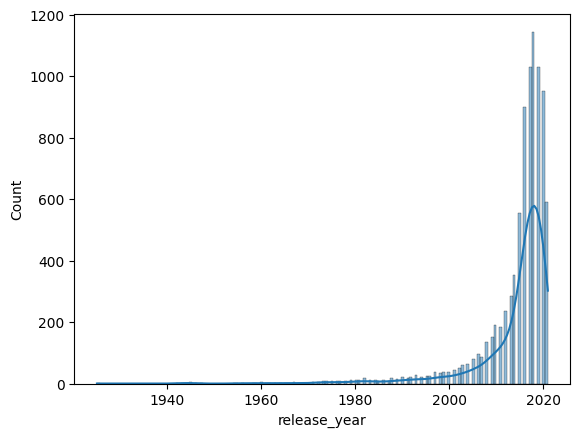

In [84]:
sns.histplot(x=new['release_year'], kde=True)

In [85]:
new['release_year'].describe()

count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [86]:
percentile25 = new['release_year'].quantile(0.25)
percentile75 = new['release_year'].quantile(0.75)
percentile25, percentile75

(2013.0, 2019.0)

In [87]:
IQR = percentile75 - percentile25
IQR

6.0

In [88]:
UL = percentile75 + 1.5*IQR
LL = percentile25 - 1.5*IQR
print(UL, '- upper limit')
print(LL, '- lower limit')

2028.0 - upper limit
2004.0 - lower limit


In [89]:
new[new['release_year'] > UL]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [90]:
new[new['release_year'] < LL]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4,s8,Movie,Sankofa,Haile Gerima,United States,24/09/21,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
29,s25,Movie,Jeans,S. Shankar,India,21/09/21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies"
51,s27,Movie,Minsara Kanavu,Rajiv Menon,India,21/09/21,1997,TV-PG,147,"Comedies, International Movies, Music & Musicals"
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,,21/09/21,1996,TV-PG,161,"Comedies, International Movies"
60,s42,Movie,Jaws,Steven Spielberg,United States,16/09/21,1975,PG,124,"Action & Adventure, Classic Movies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,,Hong Kong,20/09/18,1983,TV-14,103,"Action & Adventure, Dramas, International Movies"
8743,s8524,TV Show,The Super Mario Bros. Super Show!,,United States,22/05/16,1989,TV-Y7,1,Kids' TV
8746,s8542,TV Show,The Twilight Zone (Original Series),,United States,01/07/17,1963,TV-14,4,"Classic & Cult TV, TV Sci-Fi & Fantasy"
8761,s8645,TV Show,Twin Peaks,,United States,01/07/17,1990,TV-14,2,"Classic & Cult TV, Crime TV Shows, TV Dramas"


In [91]:
data2 = new[new['release_year'] > LL]
data2.shape

(8009, 10)

Find outliers

<Axes: xlabel='release_year'>

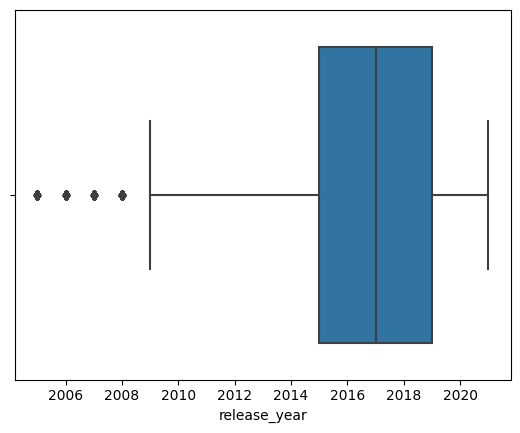

In [92]:
sns.boxplot(x = data2['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

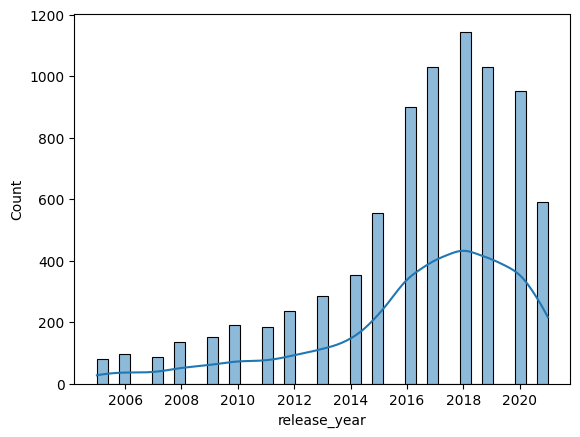

In [93]:
sns.histplot(x = data2['release_year'], kde=True)

In [94]:
data2['release_year'].describe()

count    8009.000000
mean     2016.408291
std         3.637256
min      2005.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [95]:
percentile_25 = data2['release_year'].quantile(0.25)
percentile_75 = data2['release_year'].quantile(0.75)
percentile_25, percentile_75

(2015.0, 2019.0)

In [96]:
IQR_ = percentile_75 - percentile_25
IQR

6.0

In [97]:
upper_limit = percentile_75 + 1.5*IQR_
lower_limit = percentile_25 - 1.5*IQR_
print(upper_limit, '- upper limit')
print(lower_limit, '- lower limit')

2025.0 - upper limit
2009.0 - lower limit


In [98]:
data2[data2['release_year'] > upper_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [99]:
data2[data2['release_year'] < lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
82,s58,Movie,Naruto Shippûden the Movie: Bonds,Hajime Kamegaki,Japan,15/09/21,2008,TV-PG,93,"Action & Adventure, Anime Features, Internatio..."
84,s60,Movie,Naruto Shippuden: The Movie,Hajime Kamegaki,Japan,15/09/21,2007,TV-PG,95,"Action & Adventure, Anime Features, Internatio..."
86,s62,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,Japan,15/09/21,2005,TV-PG,97,"Action & Adventure, Anime Features, Internatio..."
87,s63,Movie,Naruto the Movie 3: Guardians of the Crescent ...,Toshiyuki Tsuru,Japan,15/09/21,2006,TV-PG,95,"Action & Adventure, Anime Features, Internatio..."
181,s130,Movie,An Unfinished Life,Lasse Hallström,Germany,01/09/21,2005,PG-13,108,Dramas
...,...,...,...,...,...,...,...,...,...,...
8693,s8175,TV Show,That '70s Show,,United States,01/11/17,2005,TV-14,8,TV Comedies
8714,s8317,TV Show,The Future of Water,,Norway,01/07/16,2007,TV-PG,1,"Docuseries, International TV Shows, Science & ..."
8736,s8477,TV Show,The Real Football Factories,,United Kingdom,29/12/17,2006,TV-MA,1,"British TV Shows, Docuseries, International TV..."
8748,s8552,TV Show,The War: A Film by Ken Burns and Lynn Novick,,United States,22/02/17,2007,TV-14,1,Docuseries


In [100]:
data3 = data2[data2['release_year'] > lower_limit]
data3.shape

(7458, 10)

<Axes: xlabel='release_year'>

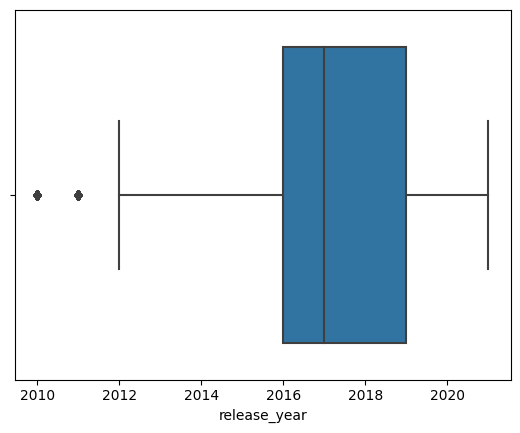

In [101]:
sns.boxplot(x=data3['release_year'])

In [102]:
data3['release_year'].describe()

count    7458.000000
mean     2017.078842
std         2.742873
min      2010.000000
25%      2016.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [103]:
upper_limit = 2019.0 + 1.5*3
lower_limit = 2016.0 - 1.5*3
print(upper_limit, ':', lower_limit, '- upper and lower limits')

2023.5 : 2011.5 - upper and lower limits


In [104]:
data3[data3['release_year'] < lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
30,s28,Movie,Grown Ups,Dennis Dugan,United States,20/09/21,2010,PG-13,103,Comedies
81,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,Japan,15/09/21,2011,TV-14,102,"Action & Adventure, Anime Features, Internatio..."
85,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,Japan,15/09/21,2010,TV-14,85,"Action & Adventure, Anime Features, Internatio..."
97,s337,TV Show,Friday Night Lights,,Pakistan,01/08/21,2010,TV-14,5,"TV Dramas, Teen TV Shows"
161,s928,TV Show,Barney and Friends,,Pakistan,01/05/21,2010,TV-Y,2,Kids' TV
...,...,...,...,...,...,...,...,...,...,...
8724,s8374,TV Show,The Jungle Book,,India,11/05/19,2010,TV-Y7,1,Kids' TV
8745,s8540,TV Show,The Tudors,,Ireland,08/01/18,2010,TV-MA,4,TV Dramas
8750,s8561,TV Show,The Womanizer,,China,01/09/16,2010,TV-MA,1,"International TV Shows, Romantic TV Shows, TV ..."
8774,s8737,TV Show,Who's the One,,Taiwan,01/01/17,2011,TV-14,1,"International TV Shows, Romantic TV Shows, TV ..."


In [105]:
data3 = data2[data2['release_year'] > lower_limit]
data3.shape

(7081, 10)

<Axes: xlabel='release_year'>

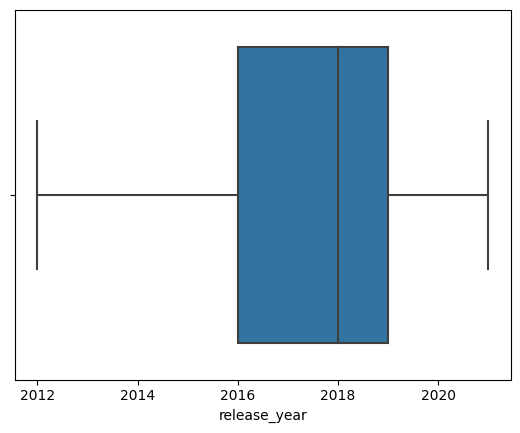

In [106]:
sns.boxplot(x=data3['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

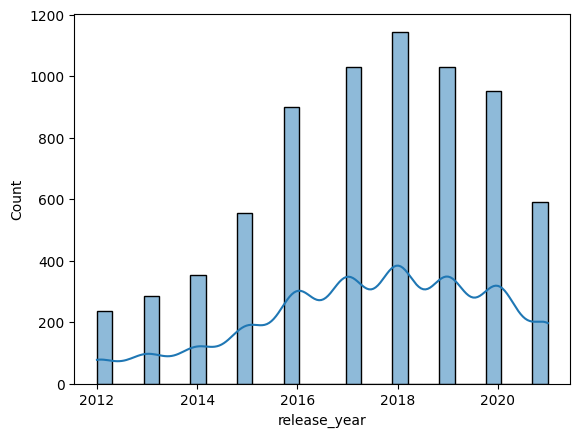

In [107]:
sns.histplot(x = data3['release_year'], kde=True)